<a href="https://colab.research.google.com/github/bxck75/A1_Colabs/blob/master/FastAI_Pokemon_WGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks'
!ls -a
!mkdir -p /content/pokemon_dataset
!cp -r 'kaggle-one-shot-pokemon.zip' /content/pokemon_dataset/
%cd /content/pokemon_dataset/
!unzip kaggle-one-shot-pokemon.zip

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks
 audio-video-swapper.ipynb
'autogenerated (1).ipynb'
 autogenerated.ipynb
 Best_Colabs
 Cartoon_cam.ipynb
 CartoonizerV6.ipynb
 CartoonizerV8.ipynb
'Copy of 03.11-Working-with-Time-Series.ipynb'
'Copy of 03B_Layers_API.ipynb'
'Copy of 03_PrettyTensor.ipynb'
'Copy of 05.14-Image-Features.ipynb'
'Copy of 20190416_cartoonize_real_world_images_using_cartoongan_and_tf2.ipynb'
'Copy of 22_Image_Captioning.ipynb'
'Copy of adver

In [0]:
# /content/drive/My Drive/
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.vision.gan import *

In [0]:
# path = Path("/content/pokemon_dataset/kaggle-one-shot-pokemon/pokemon-a")

path = Path("/content/pokemon_dataset/kaggle-one-shot-pokemon/pokemon-tcg-images")
# path = Path("/content/pokemon_dataset/kaggle-one-shot-pokemon/pokemon-b")

In [0]:
# tfms = get_transforms(flip_vert = False)

In [0]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
               .split_none()
               .label_from_func(noop)
#                .transform(tfms=None, size=size, tfm_y=True)
               .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
               .databunch(bs=bs)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

In [0]:
data = get_data(128, 64)

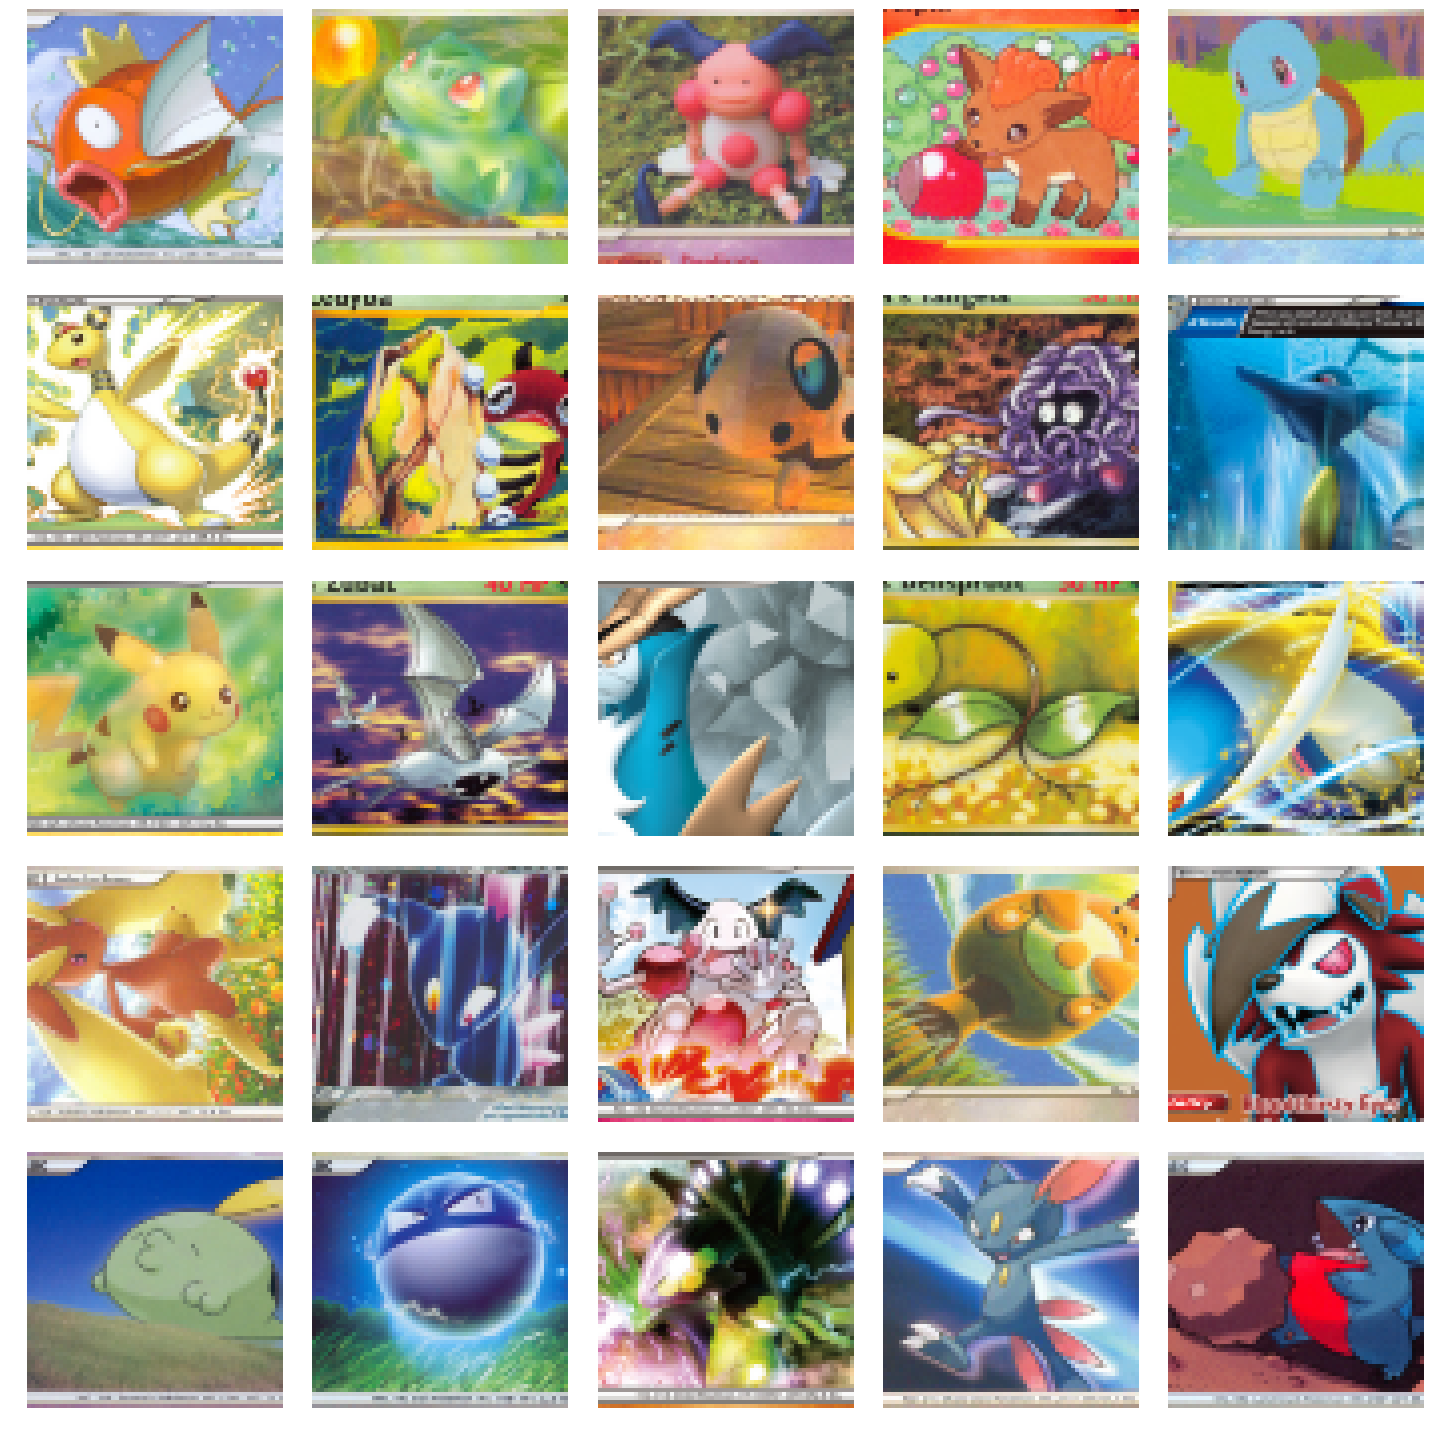

In [12]:
data.show_batch(rows=5)

In [0]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=64, n_channels=3, n_extra_layers=1)

In [0]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), wd=0., model_dir='/tmp/models')

In [20]:
# Note: After epoch 1000 started training with LR of 2e-2

!wget https://www.dropbox.com/s/xcdzb7e41620qu1/64pokemon_1200epoch.pth
learn.load('/content/pokemon_dataset/64pokemon_1200epoch')

--2019-09-06 14:54:56--  https://www.dropbox.com/s/xcdzb7e41620qu1/64pokemon_1200epoch.pth
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xcdzb7e41620qu1/64pokemon_1200epoch.pth [following]
--2019-09-06 14:54:56--  https://www.dropbox.com/s/raw/xcdzb7e41620qu1/64pokemon_1200epoch.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb32ad248bf84a694d68f1fd574.dl.dropboxusercontent.com/cd/0/inline/AoAq-JviHieC9VMWK4RrqgJveb_7N41eCgwkuzhxcMbCri9s1fqyEhZ1xVpQ5GgWOkSEOePNMS7UYH-ISmY3Srd6ecl53zt1C-YU6tCM5hbUixoi6SHVIilNtwjXCCgL7nM/file# [following]
--2019-09-06 14:54:56--  https://ucb32ad248bf84a694d68f1fd574.dl.dropboxusercontent.com/cd/0/inline/AoAq-JviHieC9VMWK4RrqgJveb_7N41eCgwkuzhxcMbCri9s1fqyEhZ1xVpQ5GgWOkSEOePNMS7UYH-IS

GANLearner(data=ImageDataBunch;

Train: LabelList (3120 items)
x: GANItemList
,,,,
y: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
Path: /content/pokemon_dataset/kaggle-one-shot-pokemon/pokemon-tcg-images;

Valid: LabelList (0 items)
x: GANItemList

y: ImageList

Path: /content/pokemon_dataset/kaggle-one-shot-pokemon/pokemon-tcg-images;

Test: None, model=GANModule(
  (generator): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): ReLU(inplace)
      (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): ReLU(inplace)
      (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4),

In [0]:
# learn.lr_find(stop_div=False, num_it=200)
# learn.recorder.plot(suggestion=True)

# LR finder produced a result of 
# Min numerical gradient: 9.12E-04
# Min loss divided by 10: 4.37E-04

# https://i.imgur.com/rBRCqjW.png
# https://i.imgur.com/8rs6xem.png

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.197035,#na#,0.215799,-0.283695,03:34


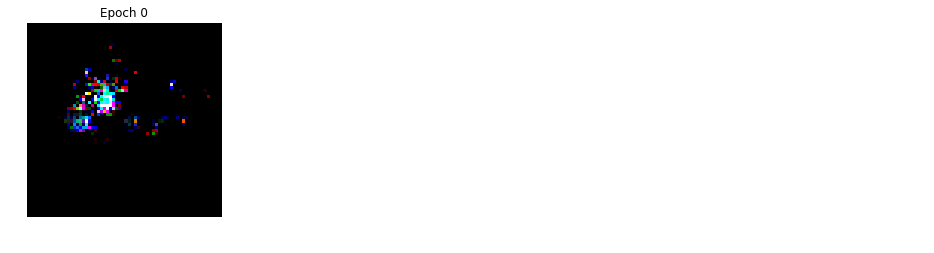

In [0]:
# learn.fit(100,9.12E-04)
learn.fit(100,2e-03)

In [0]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=2, columns=8, figsize=(20,8))

In [0]:
learn.save('/content/pokemon_dataset/64pokemon_1200epoch')